In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
image_size=256
BATCH_SIZE=32
EPOCHS=25
CHANNALS=3

In [3]:

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Asad Gul/Downloads/Compressed/Potato disease/potato",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[185. 183. 196.]
  [185. 183. 196.]
  [197. 195. 208.]
  ...
  [109. 105. 120.]
  [135. 131. 146.]
  [138. 134. 149.]]

 [[195. 193. 206.]
  [205. 203. 216.]
  [196. 194. 207.]
  ...
  [146. 142. 157.]
  [150. 146. 161.]
  [146. 142. 157.]]

 [[192. 190. 203.]
  [200. 198. 211.]
  [198. 196. 209.]
  ...
  [160. 156. 171.]
  [151. 147. 162.]
  [165. 161. 176.]]

 ...

 [[162. 160. 173.]
  [168. 166. 179.]
  [170. 168. 181.]
  ...
  [124. 122. 136.]
  [127. 125. 139.]
  [104. 102. 116.]]

 [[175. 173. 186.]
  [180. 178. 191.]
  [183. 181. 194.]
  ...
  [111. 109. 123.]
  [118. 116. 130.]
  [110. 108. 122.]]

 [[170. 168. 181.]
  [176. 174. 187.]
  [182. 180. 193.]
  ...
  [ 97.  95. 109.]
  [112. 110. 124.]
  [122. 120. 134.]]]


In [8]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


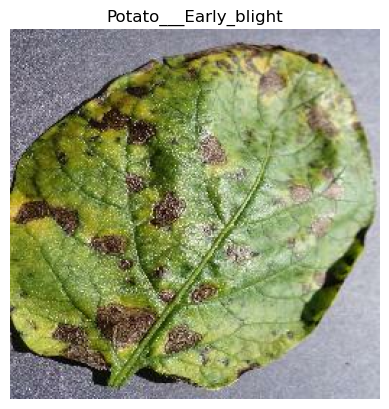

In [9]:
for image_batch , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_name[label_batch[0]])
    plt.axis("off")


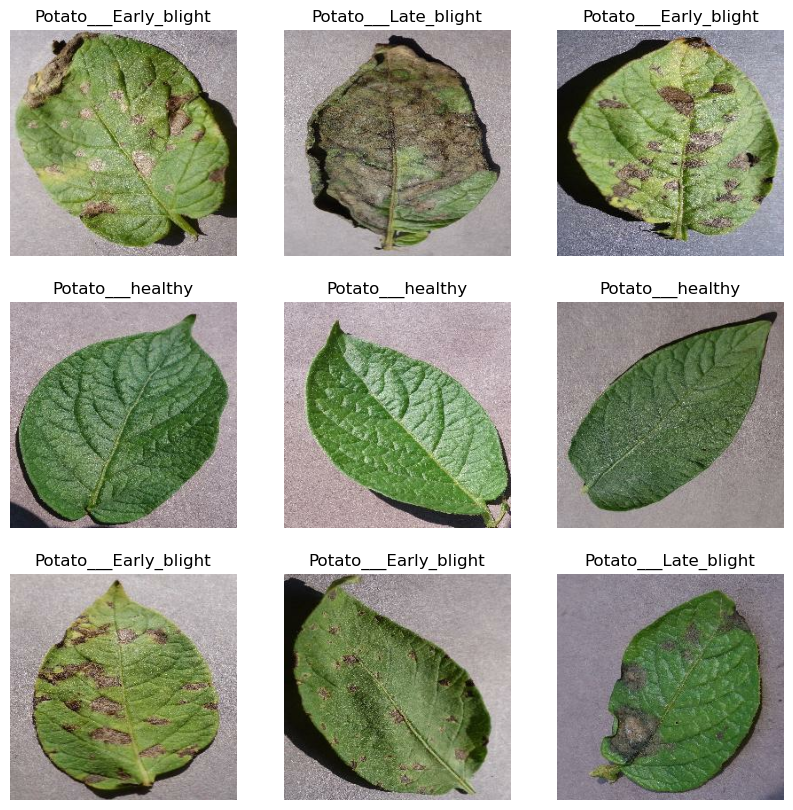

In [10]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [11]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds=dataset.take(54)
len(train_ds)


54

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8 , val_split=0.1 , test_split=0.1 , shuffle=True , shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size , seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size) 
    
    test_ds=ds.skip(train_size).skip(val_size)
                                    
    return train_ds,val_ds,test_ds

In [18]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
len(val_ds)

6

In [21]:
len(val_ds)

6

In [22]:
## using cache and prefach use both Gpu and Cpu during utilization , one is working other is loading data

In [23]:
#train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [25]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [26]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2),
])
    

In [27]:
image_shape=(BATCH_SIZE,image_size,image_size , CHANNALS)
n_classes=3
model=models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3) , activation='relu' , input_shape=image_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3) , activation='relu' ),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),    
])

model.build(input_shape=image_shape)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [29]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [30]:


history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
54/54 [==============================] - 251s 5s/step - loss: 0.9001 - accuracy: 0.4954 - val_loss: 0.9009 - val_accuracy: 0.4688
Epoch 2/25
54/54 [==============================] - 234s 4s/step - loss: 0.7288 - accuracy: 0.6586 - val_loss: 0.7983 - val_accuracy: 0.6146
Epoch 3/25
54/54 [==============================] - 318s 6s/step - loss: 0.4981 - accuracy: 0.7847 - val_loss: 0.3115 - val_accuracy: 0.8698
Epoch 4/25
54/54 [==============================] - 298s 6s/step - loss: 0.3513 - accuracy: 0.8524 - val_loss: 0.2195 - val_accuracy: 0.9167
Epoch 5/25
54/54 [==============================] - 233s 4s/step - loss: 0.2860 - accuracy: 0.8924 - val_loss: 0.1941 - val_accuracy: 0.9271
Epoch 6/25
54/54 [==============================] - 242s 4s/step - loss: 0.2226 - accuracy: 0.9091 - val_loss: 0.1609 - val_accuracy: 0.9583
Epoch 7/25
54/54 [==============================] - 333s 6s/step - loss: 0.2171 - accuracy: 0.9074 - val_loss: 0.1537 - val_accuracy: 0.9479
Epoch 8/25
54

In [31]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 5s 610ms/step - loss: 0.1184 - accuracy: 0.9531


In [32]:
scores

[0.11836117506027222, 0.953125]

In [33]:
history

In [34]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 54}

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
history.history['accuracy']

[0.49537035822868347,
 0.6585648059844971,
 0.7847222089767456,
 0.8524305820465088,
 0.8923611044883728,
 0.9091435074806213,
 0.9074074029922485,
 0.9201388955116272,
 0.9276620149612427,
 0.9230324029922485,
 0.9195601940155029,
 0.9259259104728699,
 0.9554398059844971,
 0.9317129850387573,
 0.9375,
 0.9618055820465088,
 0.9635416865348816,
 0.9548611044883728,
 0.9542824029922485,
 0.9681712985038757,
 0.9751157164573669,
 0.9623842835426331,
 0.9716435074806213,
 0.9814814925193787,
 0.9728009104728699]

In [37]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

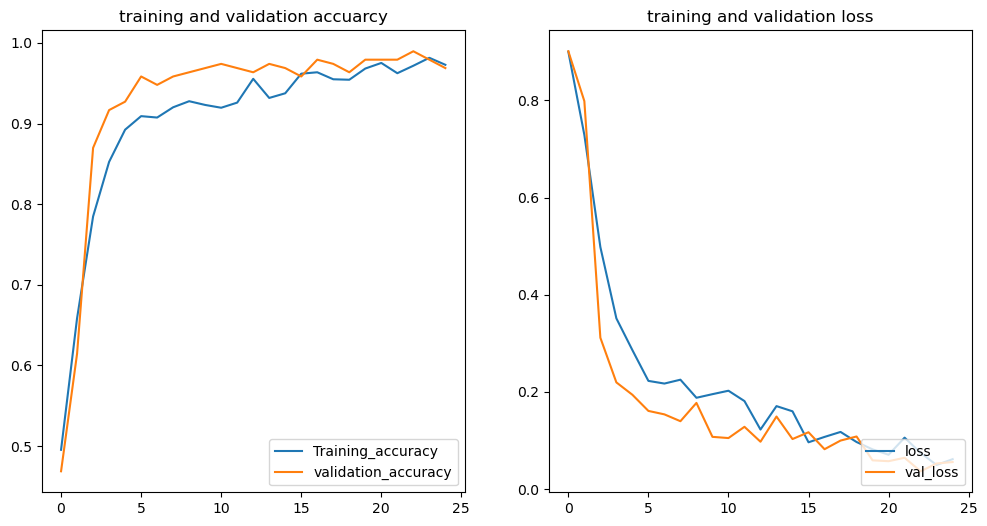

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc ,label="Training_accuracy")
plt.plot(range(EPOCHS),val_acc ,label="validation_accuracy")
plt.legend(loc="lower right")
plt.title('training and validation accuarcy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss ,label="loss")
plt.plot(range(EPOCHS),val_loss ,label="val_loss")
plt.legend(loc="lower right")
plt.title('training and validation loss')
           
           

First Image Prediction
first image label: Potato___Early_blight
predicted_label: Potato___Early_blight


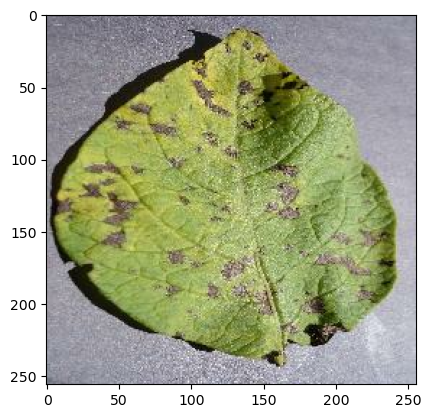

In [39]:
import numpy as np
for image_batch , label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    label_image=label_batch[0]
    print("First Image Prediction")
    plt.imshow(first_image)
    print("first image label:" , class_name[label_image.numpy()])

    batch_prediction=model.predict(image_batch)
    print("predicted_label:" ,class_name[np.argmax(batch_prediction[0])])




In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
    prediction = model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100 * np.max(prediction[0]), 2)
    return predicted_class, confidence

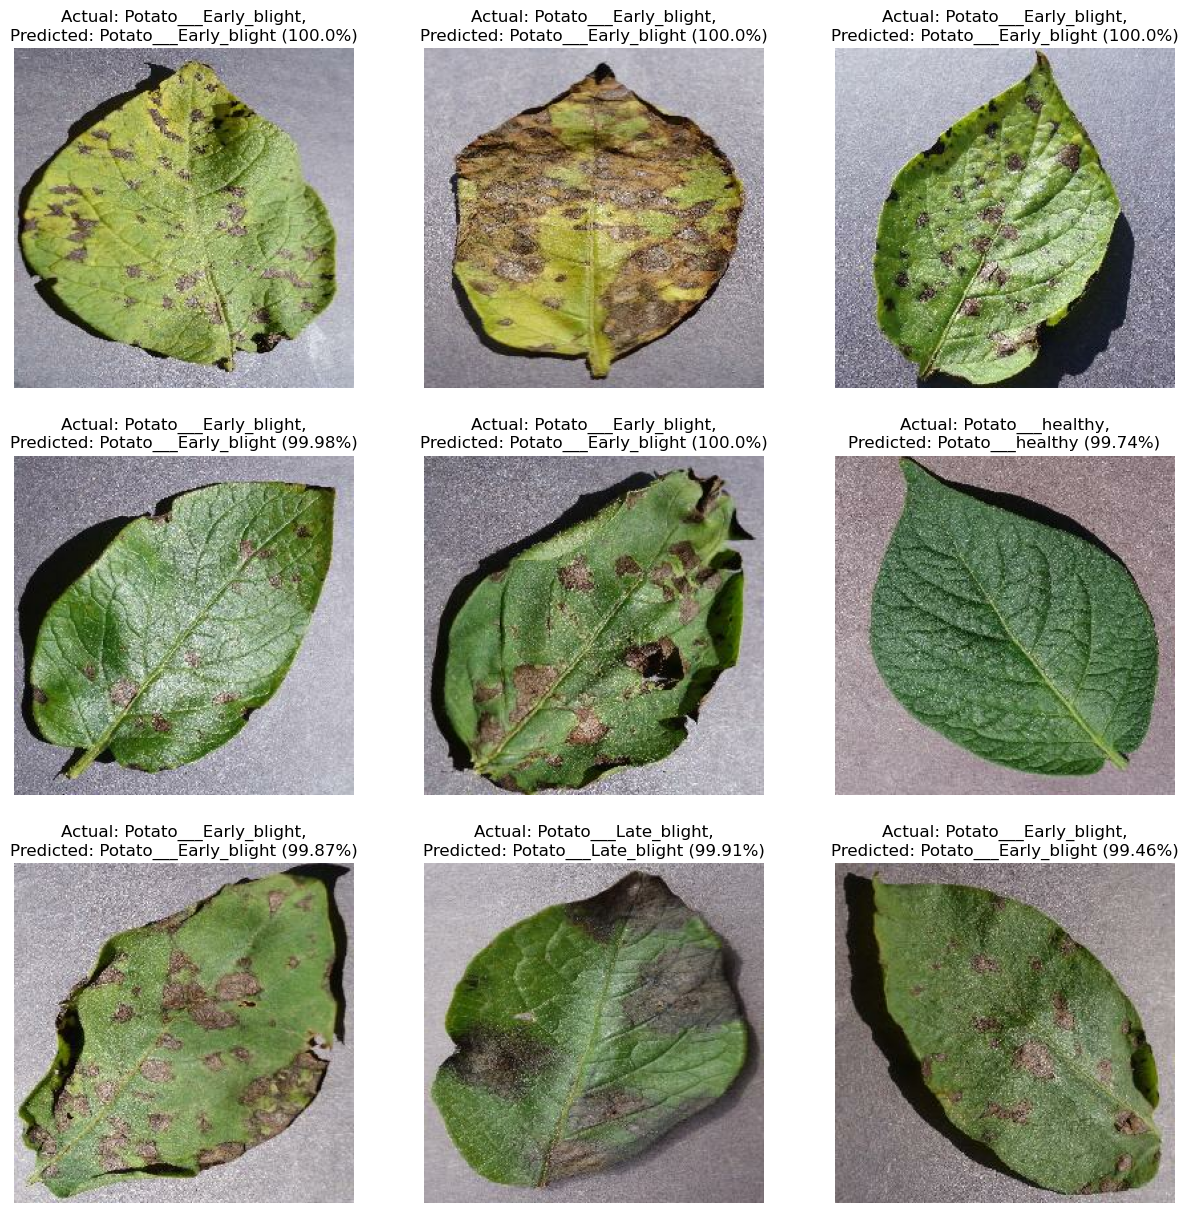

In [41]:
plt.figure(figsize=(15, 15))
for image_batch, label_batch in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model,image_batch[i].numpy())
        actual_class = class_name[label_batch[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class} ({confidence}%)")
        plt.axis("off")
                   
   

In [42]:
model_version=2
model.save(f"C:/Users/Asad Gul/Downloads/Compressed/Potato disease/model_saving/{model_version}")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Asad Gul/Downloads/Compressed/Potato disease/model_saving/2\assets


In [43]:
#!jupyter nbconvert --to pdf --output "My_Notebook.pdf" "Potato disese"
